# Aim: move rain drop down
# Цель: передвинуть каплю дождя

<img src="pictures/cloud/movie3.gif" alt="Drawing" style="width: 300px;"/>

In [1]:
from utilites.ccl import *
from utilites.plot import show_pic
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
def rotation(angle):
    """
    rotates standart basis by angle
    """
    xy = np.array([[0, 1], [1, 0]])
    a = np.radians(angle)
    r_matrix = np.array([
        [np.cos(a), -np.sin(a)],
        [np.sin(a), np.cos(a)]
    ])
    return r_matrix @ xy

# Open

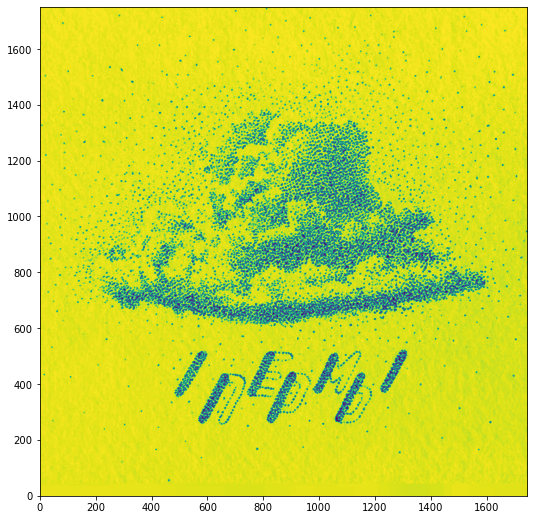

In [35]:
cloud = 'pictures/cloud/cloud.png'
cloud = cv2.imread(cloud, 0)

img = np.copy(cloud)
colors = np.copy(cloud)

img[img<157] = 1
img[img>=157] = 0

show_pic(cloud,size=9)

# Locate drop

In [25]:
x_vec=477
y_vec=1224
h=180
w=125


# Get pixcel groups

In [26]:
borders = ccl(img, square_borders=[x_vec,y_vec,w,h])
print(f'Amount of pixel groups: {len(borders)}')

Amount of pixel groups: 21


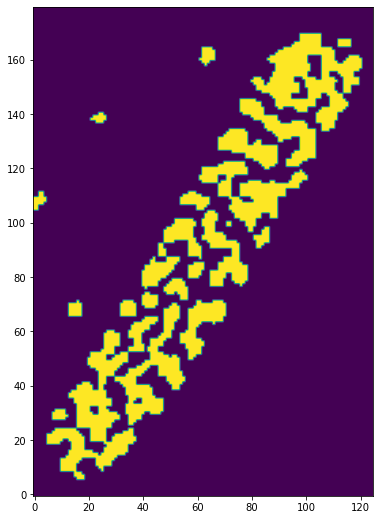

In [27]:
show_pic(crop_image(img, x=x_vec, y=y_vec, w=w, h=h), size=9)

# Move drop 5 degree lower

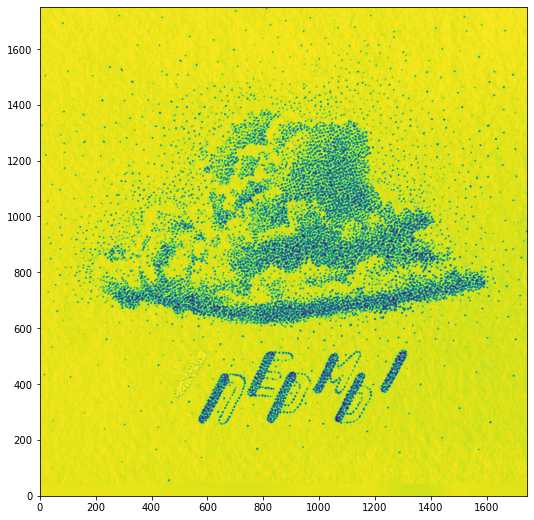

In [36]:
for border in borders.values():
    for dot in border:
        vector_scalar = np.array([x_vec+dot[0][1], y_vec+dot[0][0]])
        vector_scalar1 = np.array([x_vec+dot[1][1], y_vec+dot[1][0]])

        # Clear old drop place
        cloud[vector_scalar[1]-1,vector_scalar[0]-2:vector_scalar1[0]+2] = 255
        
show_pic(cloud,size=9)

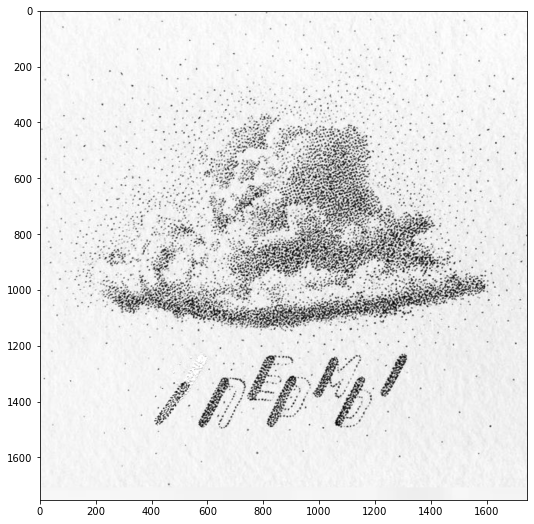

In [37]:
baias= 50
angle = -5
for border in borders.values():
    for dot in border:
        rotated_basis = rotation(angle)
        vector_scalar = np.array([x_vec+dot[0][1], y_vec+dot[0][0]])
        y, x = (rotated_basis @ vector_scalar).astype(np.int64)
        x += baias
        y += baias

        rotated_basis = rotation(angle)
        vector_scalar1 = np.array([x_vec+dot[1][1], y_vec+dot[1][0]])
        y1, x1 = (rotated_basis @ vector_scalar1).astype(np.int64)
        x1 += baias
        y1 += baias

        # Draw new drop
        cloud[y,x-1:x1+1] = colors[vector_scalar[1],vector_scalar[0]-1:vector_scalar[0]+x1+1 - x-1+1]
        
plt.figure(figsize = (9,9))
plt.imshow(cv2.cvtColor(cloud, cv2.COLOR_BGR2RGB))

# Problems

 - manual object-crop/angle/bias selection
 - object separration from other objects (as they all consists of dots)
 - color substitution after object movement